## IPL Cricket Score Prediction

In [1]:
# Import the Needed Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

In [2]:
# Load the df
df = pd.read_csv("IPL.csv")
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
# Display the columns in the df itself
print(df.columns)

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')


In [4]:
# Nummber of the columns
len(df.columns)

15

In [5]:
# Number of the Teams in Batting side
len(df['bat_team'].value_counts())

14

In [6]:
df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

In [7]:
# Number of the Teams in Bowling side
len(df['bowl_team'].value_counts())

14

In [8]:
df['bowl_team'].value_counts()

Delhi Daredevils               10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Chennai Super Kings             6497
Deccan Chargers                 3984
Sunrisers Hyderabad             3589
Pune Warriors                   3083
Gujarat Lions                   1970
Rising Pune Supergiant           962
Kochi Tuskers Kerala             736
Rising Pune Supergiants          627
Name: bowl_team, dtype: int64

### Data Preprocessing

In [9]:
# Checking null values
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [10]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [11]:
# Shape of the df
df.shape

(76014, 15)

In [12]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
# Considering the exsisting team only
consisting_team = ['Chennai Super Kings','Kolkata Knight Riders','Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad','Rajasthan Royals']

In [14]:
# Retake the Current Played Teams only in the IPL
df = df[(df['bat_team'].isin(consisting_team)) & (df['bowl_team'].isin(consisting_team))]

In [15]:
# Removing the first 5 over of the each team overs
df = df[df['overs'] >= 5.0]

In [16]:
print(df['bat_team'].unique())
print('\n')
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [17]:
print('Final Dataset Batting Teams',df['bat_team'].unique())
print('\n')
print('Final Dataset Bowling Teams',df['bowl_team'].unique())

Final Dataset Batting Teams ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


Final Dataset Bowling Teams ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [18]:
# chage the 'date' column data type object into data and time format
from datetime import datetime

In [19]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

### Handling the Categorical Feature over here

In [20]:
# Using one hot encoding with help of get_dummies
fin_df = pd.get_dummies(data=df, columns=['bat_team','bowl_team'])

In [21]:
fin_df.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,Z Khan,61,0,5.1,59,0,...,0,0,0,0,0,0,0,0,1,0
33,1,2008-04-18,M Chinnaswamy Stadium,SC Ganguly,Z Khan,61,1,5.2,59,1,...,0,0,0,0,0,0,0,0,1,0
34,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.3,59,1,...,0,0,0,0,0,0,0,0,1,0
35,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.4,59,1,...,0,0,0,0,0,0,0,0,1,0
36,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.5,58,1,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# Number of the columns of the final dataset
len(fin_df.columns)

29

In [23]:
print(fin_df.columns)

Index(['mid', 'date', 'venue', 'batsman', 'bowler', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'striker', 'non-striker', 'total',
       'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')


In [24]:
remove_features = ['mid', 'venue', 'batsman', 'bowler','striker', 'non-striker']
fin_df.drop(labels=remove_features,axis=1,inplace=True)

In [25]:
print(fin_df.columns)

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')


In [26]:
# Arrange the dataset
fin_df = fin_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','overs','runs', 'wickets','runs_last_5', 'wickets_last_5',
       'total']]

In [27]:
fin_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [28]:
# Final Dataset data types
fin_df.dtypes

date                                     datetime64[ns]
bat_team_Chennai Super Kings                      uint8
bat_team_Delhi Daredevils                         uint8
bat_team_Kings XI Punjab                          uint8
bat_team_Kolkata Knight Riders                    uint8
bat_team_Mumbai Indians                           uint8
bat_team_Rajasthan Royals                         uint8
bat_team_Royal Challengers Bangalore              uint8
bat_team_Sunrisers Hyderabad                      uint8
bowl_team_Chennai Super Kings                     uint8
bowl_team_Delhi Daredevils                        uint8
bowl_team_Kings XI Punjab                         uint8
bowl_team_Kolkata Knight Riders                   uint8
bowl_team_Mumbai Indians                          uint8
bowl_team_Rajasthan Royals                        uint8
bowl_team_Royal Challengers Bangalore             uint8
bowl_team_Sunrisers Hyderabad                     uint8
overs                                           

### Train Test Split data set

Note In this dataset we are going to split the dataset like as a time series data based on time 

In [29]:
# Spliting the data into train and test the dataset
X_train = fin_df.drop(labels='total',axis=1)[fin_df['date'].dt.year <= 2016]
X_test = fin_df.drop(labels='total',axis=1)[fin_df['date'].dt.year <= 2017]

In [30]:
y_train = fin_df[fin_df['date'].dt.year <= 2016]['total'].values
y_test = fin_df[fin_df['date'].dt.year <= 2017]['total'].values

In [31]:
# Drop the date column
X_train.drop(labels='date',axis=1,inplace=True)
X_test.drop(labels='date',axis=1,inplace=True)

### Model Creation

#### Linear Regression 

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = model.predict(X_test)

In [34]:
# Creating the pickle file
import pickle
pickle.dump(model, open('lin_model.pkl', 'wb'))

#### Random Forest Regressor

In [35]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier(max_depth=None,n_estimators=100) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Confusion Matix : \n", confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy :",accuracy_score(y_test,y_pred) * 100)
print("\n")
print("Report :", classification_report(y_test,y_pred))

Confusion Matix : 
 [[64  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 86 ...  0  0  0]
 ...
 [ 0  0  0 ... 93  0  0]
 [ 0  0  0 ...  0 92  0]
 [ 0  0  0 ...  0  0 92]]


Accuracy : 93.0387952528174


Report :               precision    recall  f1-score   support

          67       0.66      0.45      0.54       141
          70       1.00      1.00      1.00        61
          80       1.00      1.00      1.00        86
          81       1.00      1.00      1.00        65
          92       0.91      1.00      0.95       182
          94       1.00      1.00      1.00        93
          95       1.00      1.00      1.00       162
          97       1.00      1.00      1.00        43
          98       1.00      1.00      1.00        78
         101       1.00      1.00      1.00        92
         103       1.00      1.00      1.00        73
         105       1.00      1.00      1.00        93
         106       1.00      1.00      1.00        50
         107       0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV 

In [39]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,30,35,40]}
ridge_reg = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.74709e-21): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.93529e-22): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.46135e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.50393e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43432e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   15, 20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 40}
-328.4152792487924


In [41]:
prediction = ridge_reg.predict(X_test)

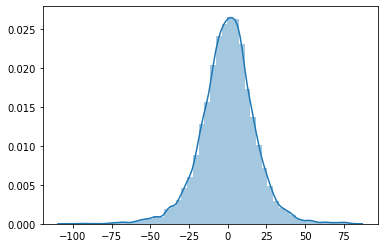

In [43]:
sns.distplot(y_test-prediction)

In [44]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.045435212212796
MSE: 303.42391940775576
RMSE: 17.419067696284888


### Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 

In [52]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,15,20,30,35,40]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4520941.271631272, tolerance: 2529.9556965945626
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4476004.438981964, tolerance: 2547.0380710286627
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4615139.222871701, tolerance: 2667.8126904366463
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

{'alpha': 1}
-320.82637898585256


In [53]:
prediction = lasso_reg.predict(X_test)

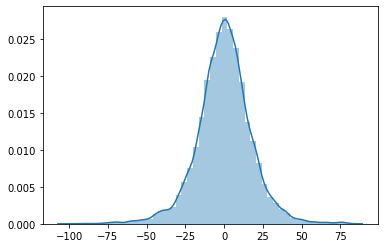

In [54]:
sns.distplot(y_test-prediction)

In [55]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 13.122714590035873
MSE: 313.7488904008719
RMSE: 17.712958262268668
